In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from sklearn.preprocessing import StandardScaler

In [2]:

df=pd.read_csv("census.csv")
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       48842 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      48842 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48842 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [4]:
df.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [5]:
df.corr()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
age,1.000000,-0.076628,0.030940,0.077229,0.056944,0.071558
fnlwgt,-0.076628,1.000000,-0.038761,-0.003706,-0.004366,-0.013519
education-num,0.030940,-0.038761,1.000000,0.125146,0.080972,0.143689
capital-gain,0.077229,-0.003706,0.125146,1.000000,-0.031441,0.082157
capital-loss,0.056944,-0.004366,0.080972,-0.031441,1.000000,0.054467
hours-per-week,0.071558,-0.013519,0.143689,0.082157,0.054467,1.000000


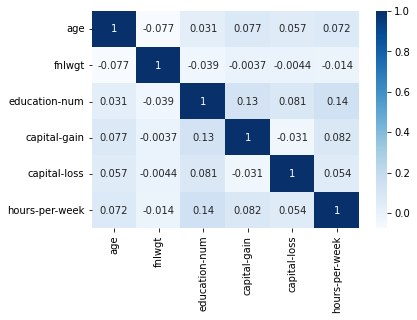

In [6]:
sns.heatmap(df.corr(),annot=True,cmap='Blues')

In [7]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [8]:
df_cat =df.select_dtypes("object")
df_num = df.select_dtypes("int64","float64")

In [9]:
from sklearn.preprocessing import LabelEncoder

In [10]:
for col in df_cat:
  le=LabelEncoder()
  df_cat[col] = le.fit_transform(df_cat[col])

In [11]:
df_cat

,workclass,education,marital-status,occupation,relationship,race,sex,native-country,income
0,4,1,4,7,3,2,1,39,0
1,4,11,2,5,0,4,1,39,0
2,2,7,2,11,0,4,1,39,1
3,4,15,2,7,0,2,1,39,1
4,0,15,4,0,3,4,0,39,0
...,...,...,...,...,...,...,...,...,...
48837,4,7,2,13,5,4,0,39,0
48838,4,11,2,7,0,4,1,39,1
48839,4,11,6,1,4,4,0,39,0
48840,4,11,4,1,3,4,1,39,0


In [12]:
df=pd.concat([df_cat,df_num],axis=1)
df

,workclass,education,marital-status,occupation,relationship,race,sex,native-country,income,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
0,4,1,4,7,3,2,1,39,0,25,226802,7,0,0,40
1,4,11,2,5,0,4,1,39,0,38,89814,9,0,0,50
2,2,7,2,11,0,4,1,39,1,28,336951,12,0,0,40
3,4,15,2,7,0,2,1,39,1,44,160323,10,7688,0,40
4,0,15,4,0,3,4,0,39,0,18,103497,10,0,0,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,4,7,2,13,5,4,0,39,0,27,257302,12,0,0,38
48838,4,11,2,7,0,4,1,39,1,40,154374,9,0,0,40
48839,4,11,6,1,4,4,0,39,0,58,151910,9,0,0,40
48840,4,11,4,1,3,4,1,39,0,22,201490,9,0,0,20


In [13]:
df['income'].value_counts()

0    37155
1    11687
Name: income, dtype: int64

In [14]:
df.corr()


,workclass,education,marital-status,occupation,relationship,race,sex,native-country,income,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
workclass,1.000000,0.017187,-0.068441,0.260005,-0.092365,0.052932,0.091223,-0.008631,0.052674,0.017526,-0.016546,0.055918,0.036044,0.010880,0.141283
education,0.017187,1.000000,-0.037417,-0.020972,-0.010758,0.013250,-0.027041,0.061469,0.080091,-0.015058,-0.022570,0.359668,0.028928,0.017638,0.057659
marital-status,-0.068441,-0.037417,1.000000,-0.017179,0.187800,-0.070104,-0.127479,-0.021375,-0.199072,-0.263978,0.029851,-0.069992,-0.043969,-0.033872,-0.185567
occupation,0.260005,-0.020972,-0.017179,1.000000,-0.076356,0.005671,0.075081,-0.013424,0.076722,-0.014259,0.000860,0.112265,0.024163,0.017180,0.079986
relationship,-0.092365,-0.010758,0.187800,-0.076356,1.000000,-0.117041,-0.579797,-0.003962,-0.253214,-0.263383,0.009092,-0.090534,-0.056510,-0.057201,-0.250400
race,0.052932,0.013250,-0.070104,0.005671,-0.117041,1.000000,0.086734,0.138231,0.070934,0.028421,-0.027062,0.029239,0.011581,0.018595,0.039694
sex,0.091223,-0.027041,-0.127479,0.075081,-0.579797,0.086734,1.000000,-0.009780,0.214628,0.088120,0.027739,0.009328,0.047094,0.045480,0.228560
native-country,-0.008631,0.061469,-0.021375,-0.013424,-0.003962,0.138231,-0.009780,1.000000,0.012210,-0.002861,-0.048680,0.049107,-0.001816,0.003449,0.000705
income,0.052674,0.080091,-0.199072,0.076722,-0.253214,0.070934,0.214628,0.012210,1.000000,0.230369,-0.006339,0.332613,0.223013,0.147554,0.227687
age,0.017526,-0.015058,-0.263978,-0.014259,-0.263383,0.028421,0.088120,-0.002861,0.230369,1.000000,-0.076628,0.030940,0.077229,0.056944,0.071558


In [15]:
x=df.drop(['income'],axis=1).values
y=df['income'].values

In [16]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)

In [17]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.33,random_state=1)


In [18]:
ann=Sequential()
ann.add(Dense(units=9,activation="relu"))
ann.add(Dense(units=5,activation="relu"))
ann.add(Dense(units=1,activation="sigmoid"))
ann.compile(optimizer='rmsprop',loss='binary_crossentropy')
ann.fit(xtrain,ytrain,epochs=100,validation_data=(xtest,ytest))

Epoch 1/100
1023/1023 [==============================] - 3s 2ms/step - loss: 0.4337 - val_loss: 0.3665
Epoch 2/100
1023/1023 [==============================] - 2s 2ms/step - loss: 0.3508 - val_loss: 0.3418
Epoch 3/100
1023/1023 [==============================] - 2s 2ms/step - loss: 0.3375 - val_loss: 0.3341
Epoch 4/100
1023/1023 [==============================] - 2s 2ms/step - loss: 0.3326 - val_loss: 0.3320
Epoch 5/100
1023/1023 [==============================] - 2s 2ms/step - loss: 0.3300 - val_loss: 0.3310
Epoch 6/100
1023/1023 [==============================] - 2s 2ms/step - loss: 0.3286 - val_loss: 0.3287
Epoch 7/100
1023/1023 [==============================] - 2s 2ms/step - loss: 0.3270 - val_loss: 0.3282
Epoch 8/100
1023/1023 [==============================] - 2s 2ms/step - loss: 0.3258 - val_loss: 0.3269
Epoch 9/100
1023/1023 [==============================] - 2s 2ms/step - loss: 0.3248 - val_loss: 0.3261
Epoch 10/100
1023/1023 [==============================] - 2s 2ms/step - l

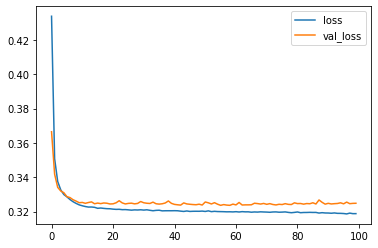

In [19]:
lossdf = pd.DataFrame(ann.history.history)
lossdf.plot()

In [20]:
ann=Sequential()
ann.add(Dense(units=9,activation="relu"))
ann.add(Dense(units=5,activation="relu"))
ann.add(Dense(units=1,activation="sigmoid"))
ann.compile(optimizer='rmsprop',loss='binary_crossentropy')

In [21]:
from tensorflow.keras.callbacks import EarlyStopping


In [22]:
earlystop = EarlyStopping(monitor="val_loss", mode = "min", verbose=1, patience=25)


In [23]:
ann.fit(xtrain,ytrain,epochs=100,validation_data=(xtest,ytest),callbacks=[earlystop])


Epoch 1/100
1023/1023 [==============================] - 2s 2ms/step - loss: 0.4299 - val_loss: 0.3770
Epoch 2/100
1023/1023 [==============================] - 2s 2ms/step - loss: 0.3590 - val_loss: 0.3480
Epoch 3/100
1023/1023 [==============================] - 2s 2ms/step - loss: 0.3403 - val_loss: 0.3362
Epoch 4/100
1023/1023 [==============================] - 2s 2ms/step - loss: 0.3340 - val_loss: 0.3323
Epoch 5/100
1023/1023 [==============================] - 2s 2ms/step - loss: 0.3314 - val_loss: 0.3307
Epoch 6/100
1023/1023 [==============================] - 2s 2ms/step - loss: 0.3297 - val_loss: 0.3296
Epoch 7/100
1023/1023 [==============================] - 2s 2ms/step - loss: 0.3286 - val_loss: 0.3293
Epoch 8/100
1023/1023 [==============================] - 2s 2ms/step - loss: 0.3276 - val_loss: 0.3291
Epoch 9/100
1023/1023 [==============================] - 2s 2ms/step - loss: 0.3269 - val_loss: 0.3278
Epoch 10/100
1023/1023 [==============================] - 2s 2ms/step - l

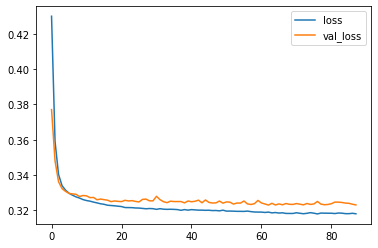

In [24]:
lossdf = pd.DataFrame(ann.history.history)
lossdf.plot()

In [25]:
ypred=ann.predict(xtest)

In [26]:
ypred=ypred>0.5


In [27]:
from sklearn.metrics import accuracy_score, classification_report
print(classification_report(ytest,ypred))
print(accuracy_score(ytest,ypred))


              precision    recall  f1-score   support

           0       0.88      0.94      0.91     12216
           1       0.76      0.58      0.66      3902

    accuracy                           0.85     16118
   macro avg       0.82      0.76      0.78     16118
weighted avg       0.85      0.85      0.85     16118

0.8545725276088845


In [28]:
from tensorflow.keras.models import load_model
ann.save("census_salary_pred")

INFO:tensorflow:Assets written to: census_salary_pred/assets


In [29]:
loan=load_model("census_salary_pred")
